## Data Clustering Using Unsupervised Machine Learning

### What Problem Am I Attempting to Solve?

The objective is to classify countries based on socioeconomic and health indicators that influence their overall development. This classification will help identify countries that are in the most critical need of assistance.

The dataset has been provided by HELP International, a non-profit organization dedicated to eradicating poverty and providing essential aid to individuals in developing nations. HELP International aims to leverage machine learning to develop a data-driven approach for prioritizing their humanitarian efforts.

### Problem Statement

HELP International has successfully raised approximately $10 million to support its mission. The organization's leadership now faces the challenge of allocating these funds strategically to maximize their impact. The CEO seeks to identify the countries that are in the greatest need of assistance based on their socioeconomic and health conditions.

As a data scientist, your task is to analyze the provided data, classify countries into meaningful clusters, and recommend which countries should be prioritized for aid. This analysis will enable HELP International to make informed decisions and optimize the allocation of resources to address global poverty effectively.


### Methodology

In [1]:
#Load ML Python libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
#The the first csv files
my_file_1="Country-data.csv"
df=pd.read_csv(my_file_1, encoding='utf-8')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
#Get the second csv file. This describes of the columns in the dataset.
my_file_2="data-dictionary.csv"
data_dict=pd.read_csv(my_file_2, encoding='utf-8')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


### Data Cleaning

In [4]:
df.shape

(167, 10)

In [5]:
#Check for missing values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#Drop duplicates rows from dataframe
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis

In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### Univariate Analysis

Look for outliers in data columns.

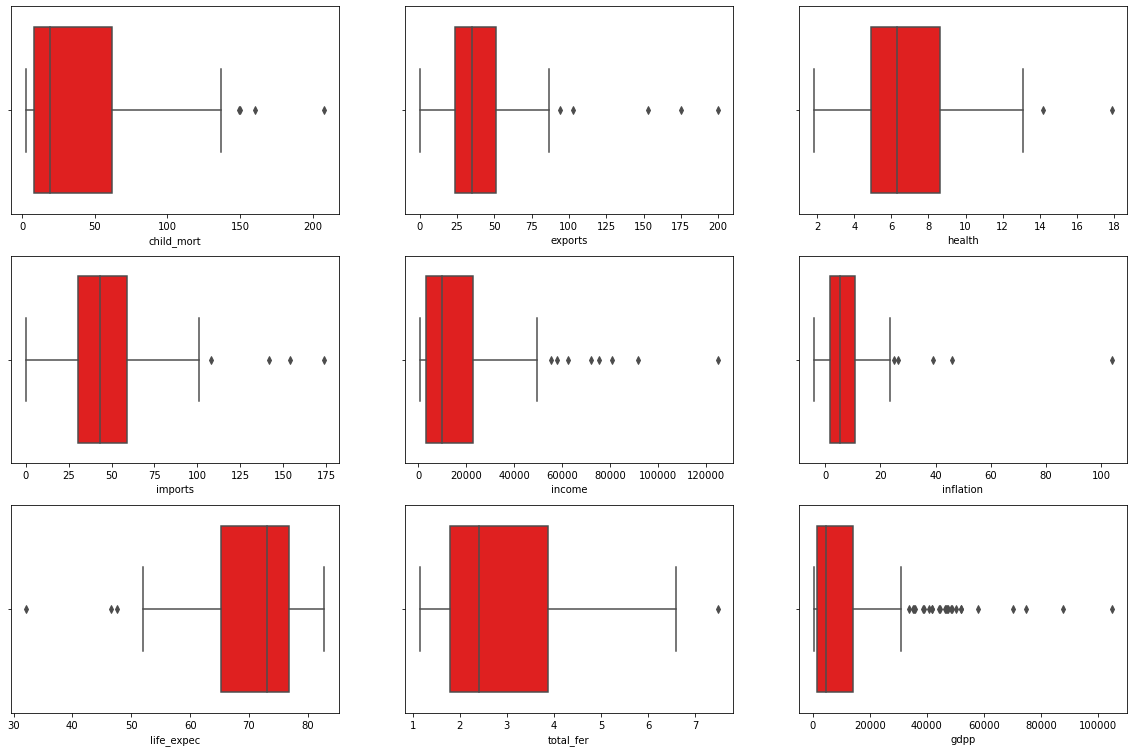

In [8]:
fig,axs=plt.subplots(3,3,figsize=(20,13))
col=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
ax=axs.flatten()
for i,j in enumerate(col):
    sns.boxplot(x=df[j],ax=ax[i],color='red')

#### Multivariate Analysis

Examine the relationship between two or more variables and identifies which, if any, are related to a certain outcome.

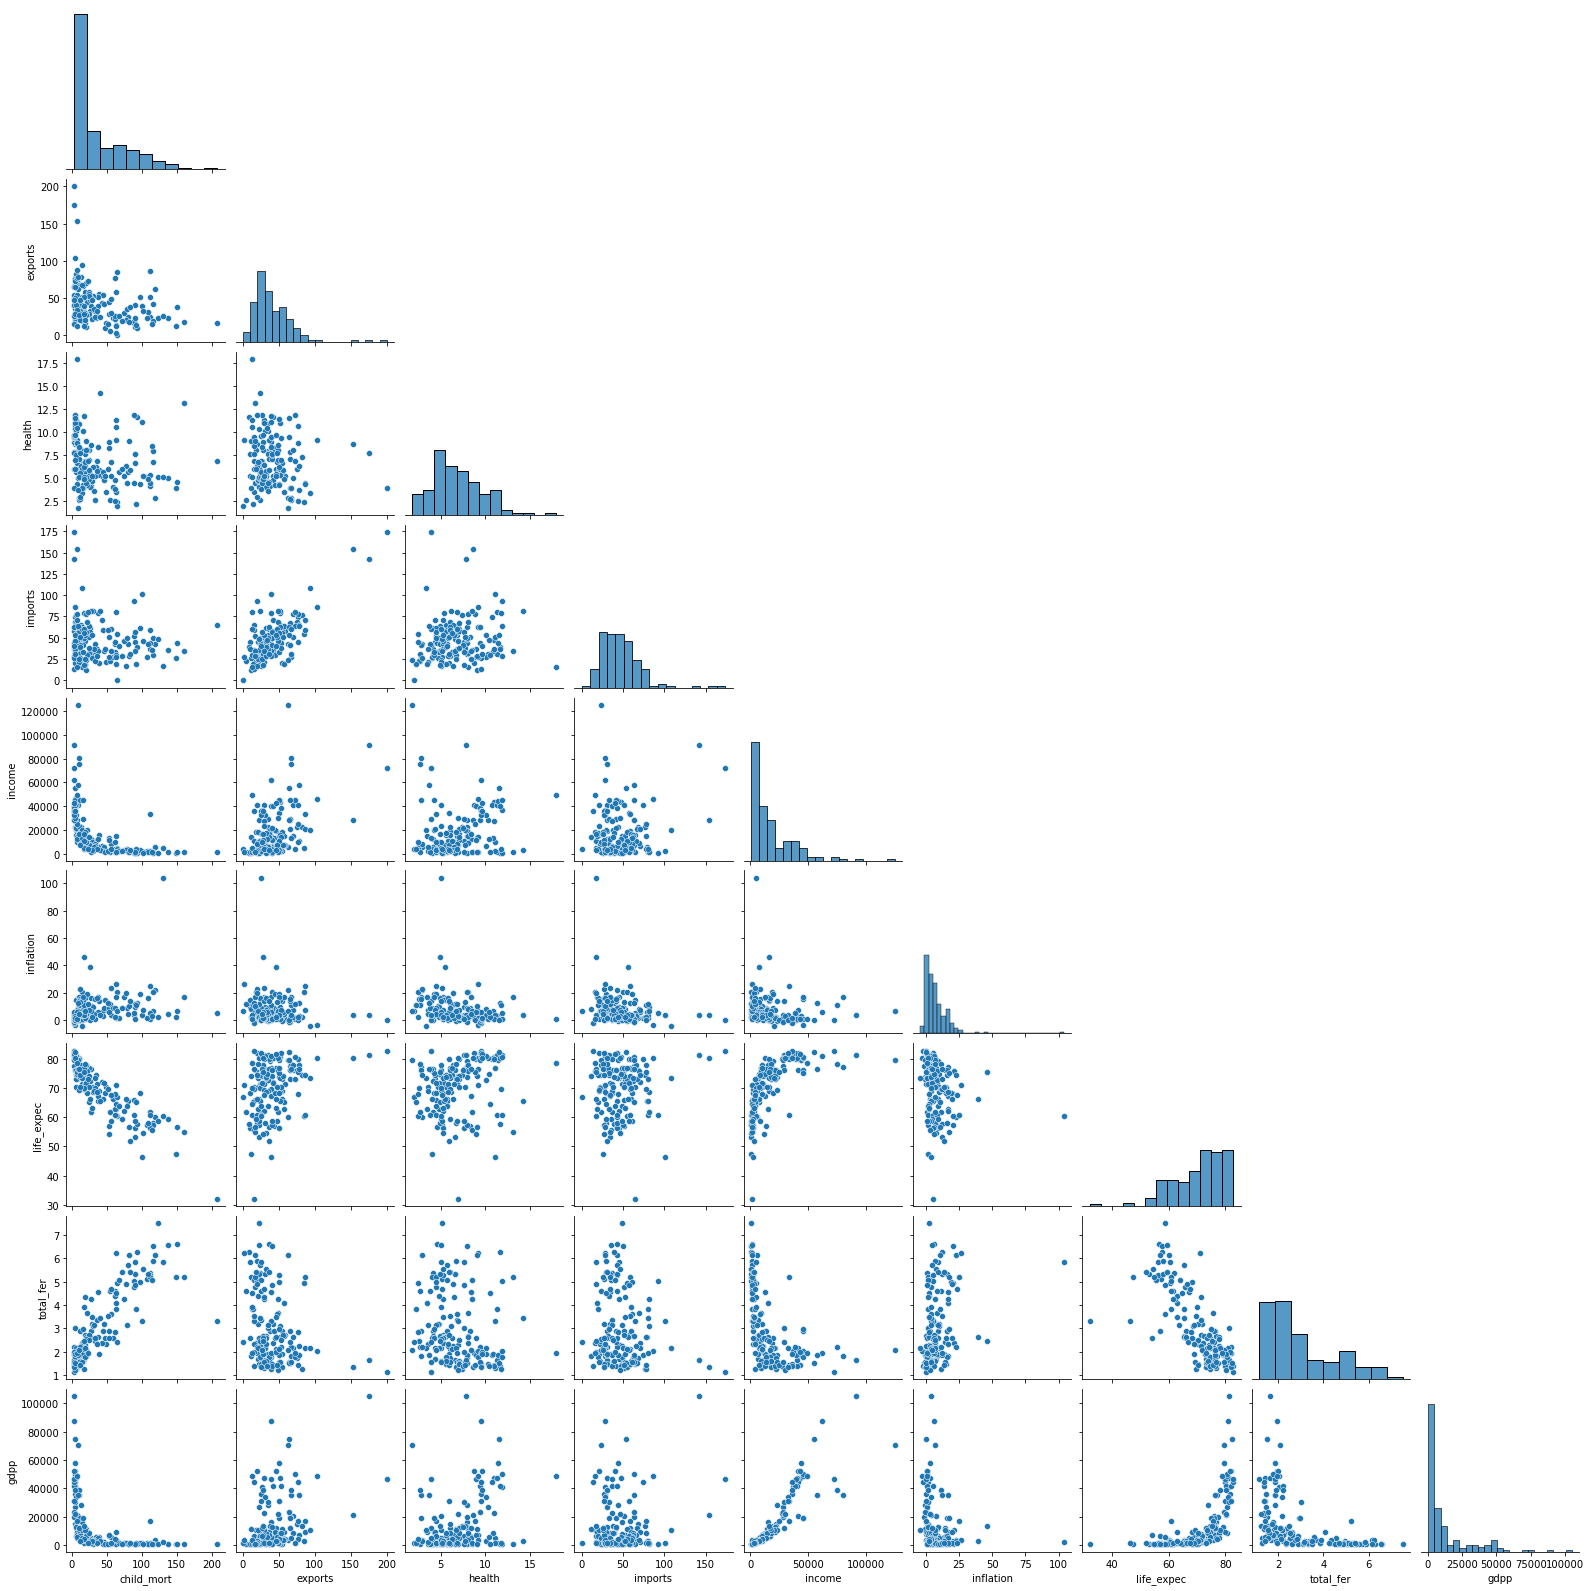

In [9]:
sns.pairplot(df,corner=True)

As shown in the graph above, there appear to be a number of relationships.

#### Correlation

In [10]:
#Get data set correlation statistics
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


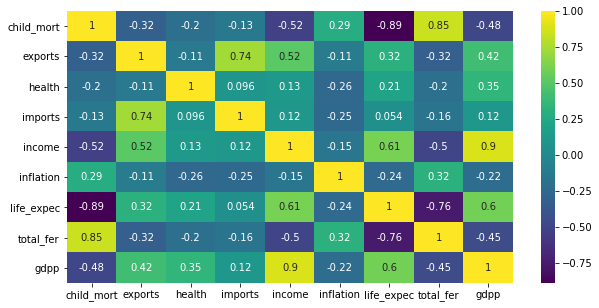

In [11]:
#Use a heatmap to visualize the data set correlation
fig = plt.figure(figsize=(10,5))
ax = sns.heatmap(df.corr(),annot=True,cmap = 'viridis')
plt.show()

### K-Means Clustering

Because of the substantial difference errors in the elbow plot, k=3,4 is a good choice. To choose between the two, we choose with silhouette score.

According to the graph above, k=4 has a higher silhouette score than k=3. Although however, k=5 shows a high silhouette score, but the number of clusters should not be too high. Thus we choose k=3.

#### Hierarchial Clustering

I'll utilise hierarchical clustering to figure out which countries require assistance.

* Begin by importing the library: from sklearn.cluster import AgglomerativeClustering

* The silhouette score of k=2 is good.

Replace labels with 'Needs Help' or 'Does Not Need Help'

### Data Preprocessing

In [12]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
#Scale the data set excluding the country column.
data=df.drop('country',axis=1)

In [14]:
# #Import min-max scaler for scaling the dataframe.
# from sklearn.preprocessing import MinMaxScaler
# scalar = MinMaxScaler()

#Use standard scaler instead.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data=s.fit_transform(data);

### Data Visualization

In [15]:
#Get the GDP count
exp.histogram(data_frame=df,x = 'gdpp',nbins=167,opacity=0.75,barmode='overlay')

In [16]:
#Get visualization for child mortality vs. health data for the various countries
exp.scatter(data_frame=df,x = 'child_mort',y = 'health',color='country')

### K-Means Clustering

In [17]:
#Elbow plot
from sklearn.cluster import KMeans

ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    ssd.append(km.inertia_) 

C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



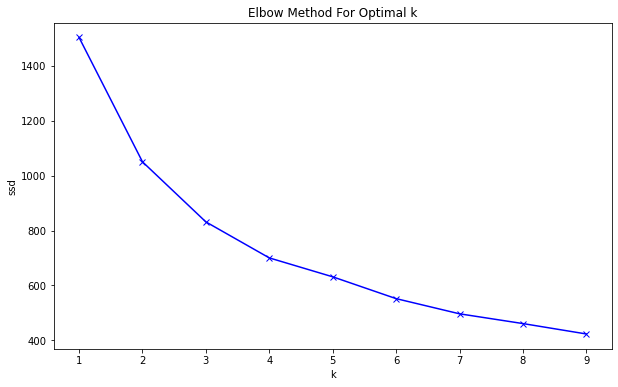

In [18]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

Because of the substantial difference errors in the elbow plot, k=3,4 is a good choice. To choose between the two, we choose with silhouette score.

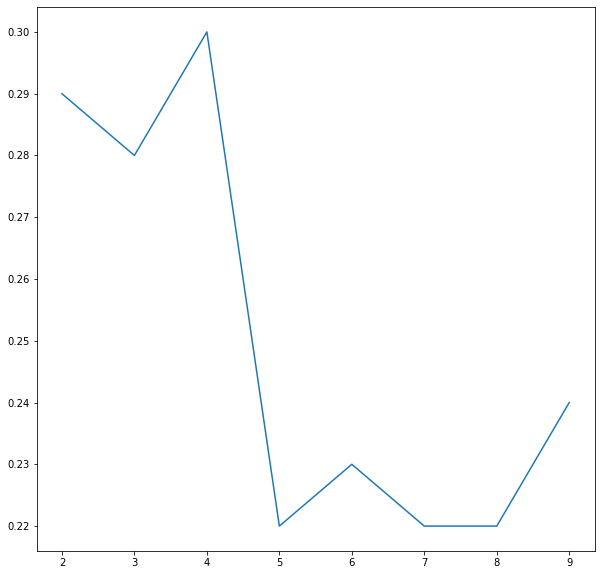

In [19]:
#Finding the optimum K to cluster the data set using the silhouette score.
score=[]
plt.figure(figsize=(10,10))
for i in range(2,10):
    k=KMeans(i)
    k.fit(data)
    score.append(np.round(silhouette_score(data,k.labels_),2))
plt.plot(range(2,10),score)

According to the graph above, k=4 has a higher silhouette score than k=3. Although however, k=5 shows a high silhouette score, but the number of clusters should not be too high. Thus we choose k=4.

In [20]:
k=KMeans(n_clusters=4,random_state=42)
k.fit(data)
df['k_labels']=k.labels_

In [21]:
pred = k.labels_
print(pred)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [22]:
#Cluster GDP vs. Income
exp.scatter(data_frame= df,x = 'gdpp',y = 'income',color=k.labels_)

### Visualize the Clusters with PCA

In [23]:
#Perform linear dimensionality reduction on data using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_model = pca.fit_transform(data)
data_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
data_transform['Cluster'] = pred

In [24]:
#Get the transformed data
data_transform.head()

,PCA1,PCA2,Cluster
0,-2.913025,0.095621,1
1,0.429911,-0.588156,0
2,-0.285225,-0.455174,0
3,-2.932423,1.695555,1
4,1.033576,0.136659,0


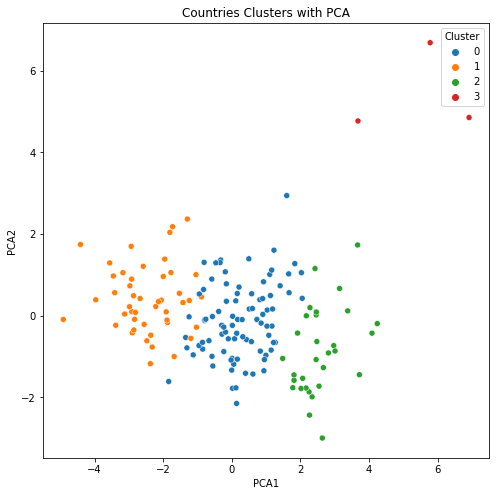

In [25]:
#Using PCA, visualize country clusters.
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=data_transform, x='PCA1', y='PCA2', palette=sns.color_palette()[:4], hue='Cluster')
title = plt.title('Countries Clusters with PCA')

#### Hierarchial Clustering

I'll utilise hierarchical clustering to figure out which countries require assistance.

* Begin by importing the library: from sklearn.cluster import AgglomerativeClustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

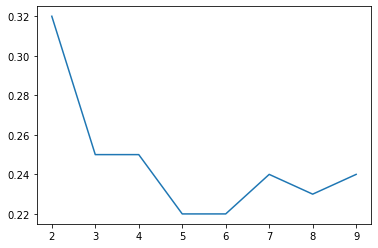

In [27]:
score=[]
for i in range(2,10):
    a=AgglomerativeClustering(i)
    a.fit(data)
    score.append(np.round(silhouette_score(data,a.labels_),2))
plt.plot(range(2,10),score)

* The silhouette score of k=2 is good.

In [28]:
#Cluster the data into two clusters using Agglomerative clustering.
a=AgglomerativeClustering(2)
a.fit(data)
df['hier_labels']=a.labels_

In [29]:
#The "hier_labels" is added to dataframe.
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [30]:
df.drop('hier_labels',axis=1).groupby(['k_labels','country']).mean()

child_mort  exports  health  imports  income  \
k_labels country                                                             
0        Albania                    16.6     28.0    6.55     48.6    9930   
         Algeria                    27.3     38.4    4.17     31.4   12900   
         Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
         Argentina                  14.5     18.9    8.10     16.0   18700   
         Armenia                    18.1     20.8    4.40     45.3    6700   
...                                  ...      ...     ...      ...     ...   
2        United Kingdom              5.2     28.2    9.64     30.8   36200   
         United States               7.3     12.4   17.90     15.8   49400   
3        Luxembourg                  2.8    175.0    7.77    142.0   91700   
         Malta                       6.8    153.0    8.65    154.0   28300   
         Singapore                   2.8    200.0    3.96    174.0   72100   

                              inflation  life_expec  total_fer    gdpp  
k_labels country                                                        
0        Albania                  4.490        76.3       1.65    4090  
         Algeria                 16.100        76.5       2.89    4460  
         Antigua and Barbuda      1.440        76.8       2.13   12200  
         Argentina               20.900        75.8       2.37   10300  
         Armenia                  7.770        73.3       1.69    3220  
...                                 ...         ...        ...     ...  
2        United Kingdom           1.570        80.3       1.92   38900  
         United States            1.220        78.7       1.93   48400  
3        Luxembourg               3.620        81.3       1.63  105000  
         Malta                    3.830        80.3       1.36   21100  
         Singapore               -0.046        82.7       1.15   46600  

[167 rows x 9 columns]

Replace labels with 'Needs help' or 'Is Self-sufficient'

In [31]:
def func(x):
    if x==0:
        return 'Needs help priority-1' 
    elif x==1:
        return 'Needs help priority-2'
    elif x==2:
        return 'Needs help priority-3'
    else:
        return 'Is Self-sufficient'
df['k_labels']=df['k_labels'].map(lambda x: func(x))

In [32]:
df.drop('k_labels',axis=1).groupby(['hier_labels','country']).mean()

child_mort  exports  health  imports  \
hier_labels country                                                      
0           Afghanistan                 90.2     10.0    7.58     44.9   
            Albania                     16.6     28.0    6.55     48.6   
            Algeria                     27.3     38.4    4.17     31.4   
            Angola                     119.0     62.3    2.85     42.9   
            Antigua and Barbuda         10.3     45.5    6.03     58.9   
...                                      ...      ...     ...      ...   
1           Sweden                       3.0     46.2    9.63     40.7   
            Switzerland                  4.5     64.0   11.50     53.3   
            United Arab Emirates         8.6     77.7    3.66     63.6   
            United Kingdom               5.2     28.2    9.64     30.8   
            United States                7.3     12.4   17.90     15.8   

                                  income  inflation  life_expec  total_fer  \
hier_labels country                                                          
0           Afghanistan             1610      9.440        56.2       5.82   
            Albania                 9930      4.490        76.3       1.65   
            Algeria                12900     16.100        76.5       2.89   
            Angola                  5900     22.400        60.1       6.16   
            Antigua and Barbuda    19100      1.440        76.8       2.13   
...                                  ...        ...         ...        ...   
1           Sweden                 42900      0.991        81.5       1.98   
            Switzerland            55500      0.317        82.2       1.52   
            United Arab Emirates   57600     12.500        76.5       1.87   
            United Kingdom         36200      1.570        80.3       1.92   
            United States          49400      1.220        78.7       1.93   

                                   gdpp  
hier_labels country                      
0           Afghanistan             553  
            Albania                4090  
            Algeria                4460  
            Angola                 3530  
            Antigua and Barbuda   12200  
...                                 ...  
1           Sweden                52100  
            Switzerland           74600  
            United Arab Emirates  35000  
            United Kingdom        38900  
            United States         48400  

[167 rows x 9 columns]

In [33]:
def func(x):
    if x==0:
        return 'Needs help'
    else:
        return 'Is Self-sufficient'
df['hier_labels']=df['hier_labels'].map(lambda x: func(x))

In [34]:
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Needs help priority-2,Needs help
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Needs help priority-1,Needs help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Needs help priority-1,Needs help
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Needs help priority-2,Needs help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Needs help priority-1,Needs help
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Needs help priority-1,Needs help
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Needs help priority-1,Needs help
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Needs help priority-3,Is Self-sufficient
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Needs help priority-3,Is Self-sufficient
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Needs help priority-1,Needs help


## Result

In [35]:
print('Based on K-Means clustering, the countries that require the most assistance (on priority-1) are:')
df.loc[df['k_labels']=='Needs help priority-1']['country'].to_list()

Based on K-Means clustering, the countries that require the most assistance (on priority-1) are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent an

In [36]:
print('Based on Hierarchial clustering, the countries that require the most assistance are:')
df.loc[df['hier_labels']=='Needs help']['country'].to_list()

Based on Hierarchial clustering, the countries that require the most assistance are:


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lithuania',
 'Macedonia, FYR',
 

### Summary

* This machine learning model effectively clusters countries based on their socioeconomic and health indicators, providing a clear framework for HELP International to prioritize their humanitarian efforts.

* To enhance the model's performance and ensure fairness, I will collaborate with subject matter experts to refine the data and validate the clustering results. This will help ensure that the recommendations are unbiased and equitable for all countries represented.